<a href="https://colab.research.google.com/github/AkithaPasandul/Predictive-Model-for-Agriculture/blob/main/Predictive_Modeling_for_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Data Cleaning

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


* No missing values in any column and dataset is complete.

Because in this project farmer can measure only one soil attribute. So drop irrelavate columns

In [8]:
df.drop(['temperature','humidity','rainfall'],axis=1,inplace=True)

In [9]:
df.head()

,N,P,K,ph,label
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


Check the class distribution

In [10]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100




*   Dataset is reasonably balanced
*   No sampling needed



Check outliers

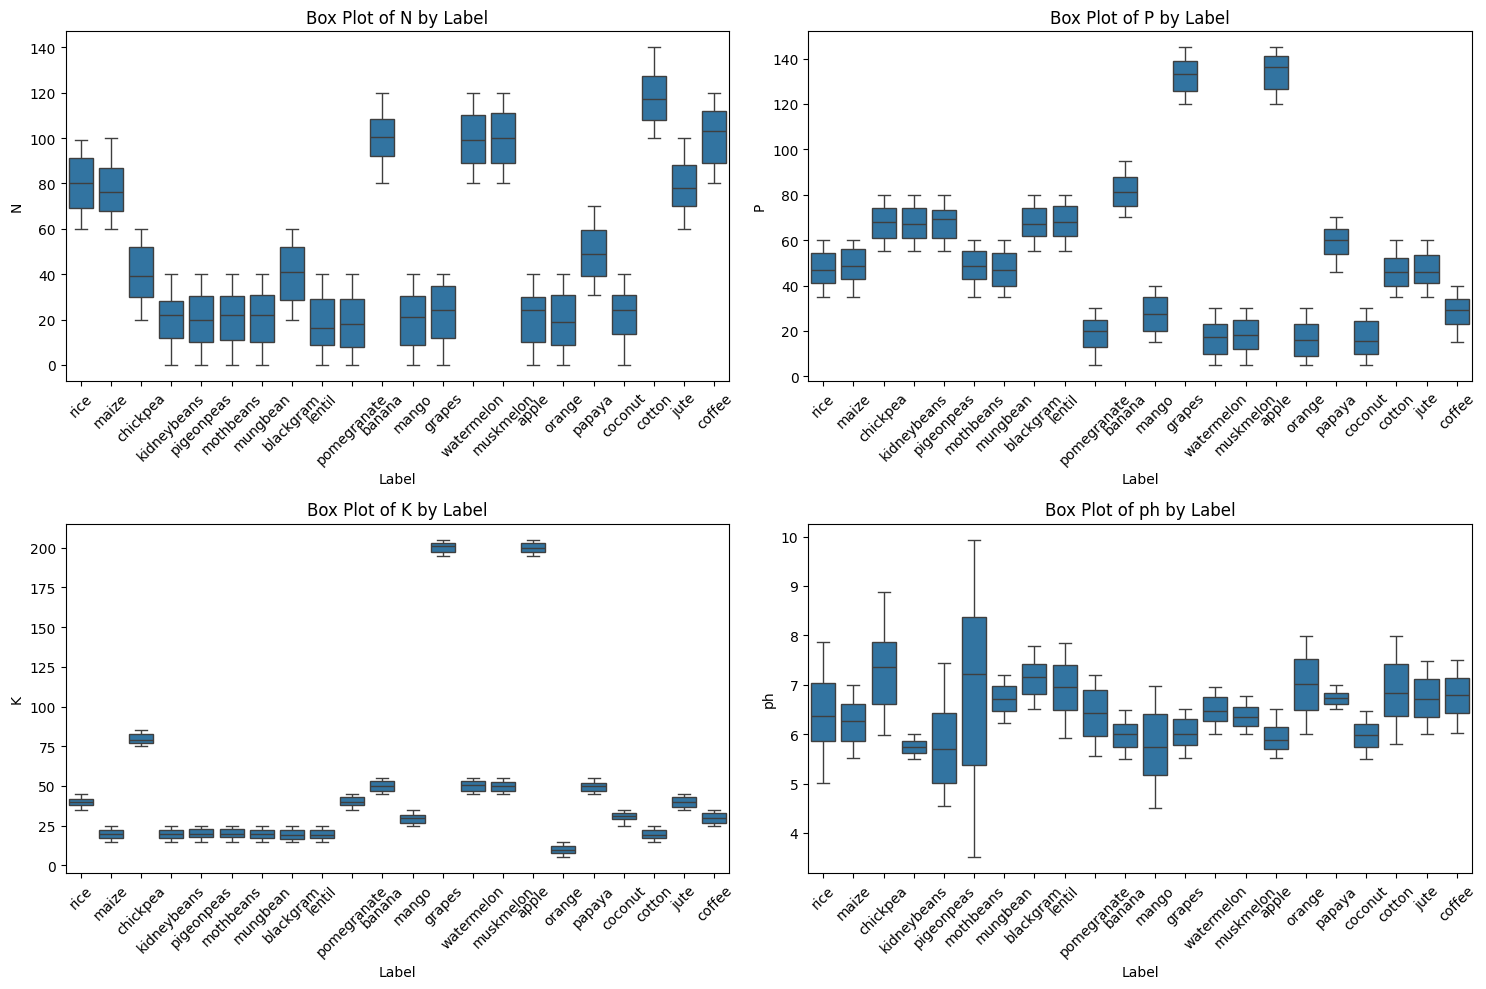

In [11]:
soil_attributes = ['N', 'P', 'K', 'ph']

plt.figure(figsize=(15, 10))
for i, attribute in enumerate(soil_attributes, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='label', y=attribute, data=df)
    plt.title(f'Box Plot of {attribute} by Label')
    plt.xticks(rotation=45)
    plt.xlabel('Label')
    plt.ylabel(attribute)
plt.tight_layout()
plt.show()

* No outlier detected

Check data types

In [12]:
df.dtypes

,0
N,int64
P,int64
K,int64
ph,float64
label,object


In [13]:
df_clean = df.copy()

# EDA

Objective of EDA

* Understand the distribution of soil features

* Analyze how each soil attribute relates to crop types

* Identify which single feature has the strongest discriminatory power

**Target variable analysis**

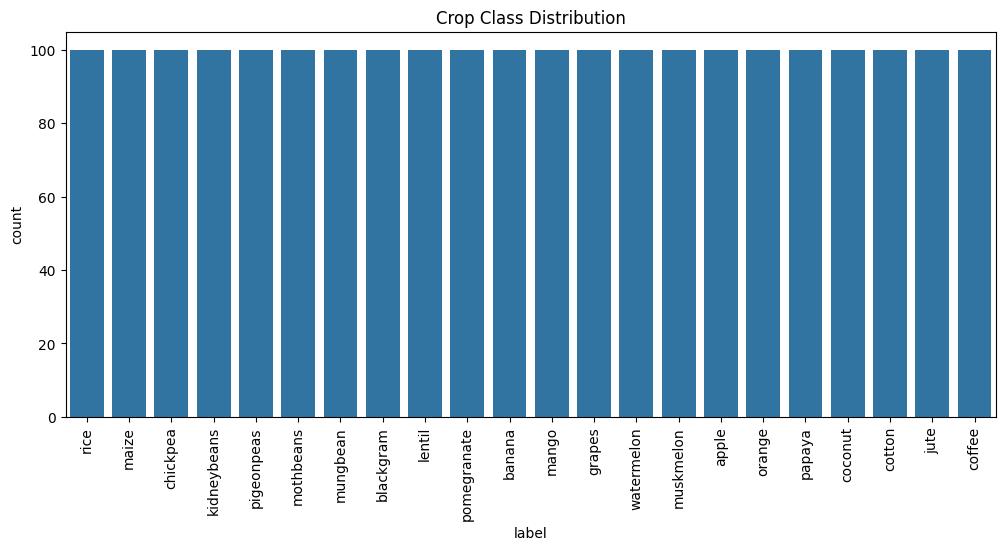

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=df_clean)
plt.xticks(rotation=90)
plt.title("Crop Class Distribution")
plt.show()

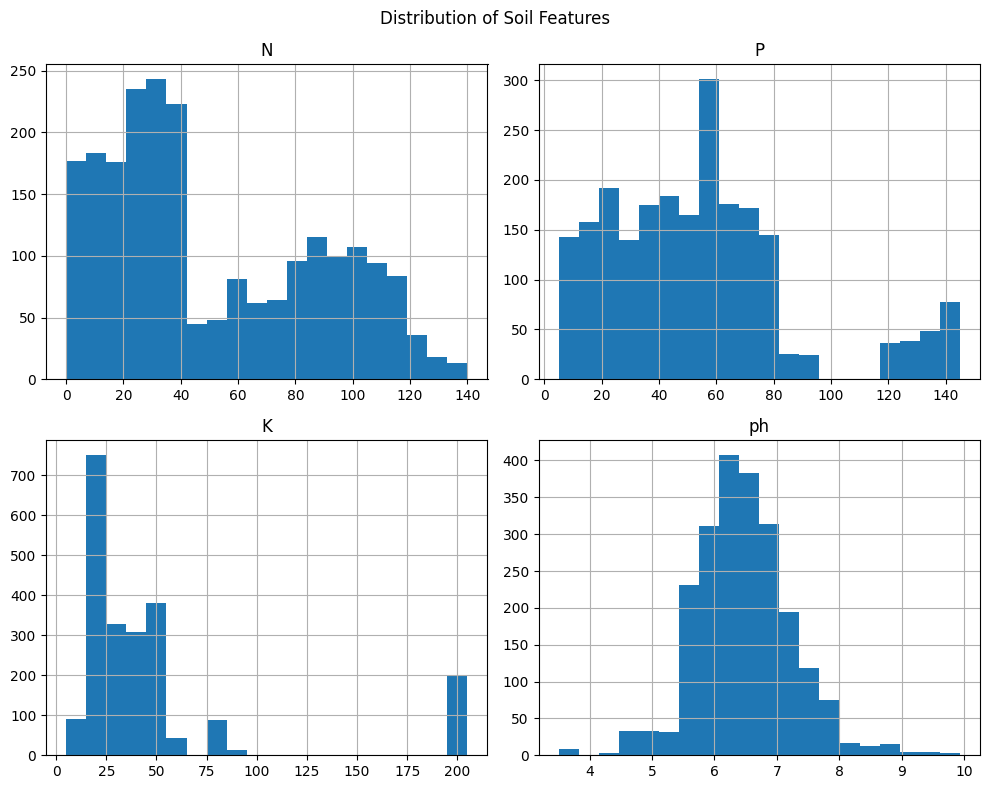

In [15]:
df_clean[['N', 'P', 'K', 'ph']].hist(bins=20, figsize=(10, 8))
plt.suptitle("Distribution of Soil Features")
plt.tight_layout()
plt.show()

**Feature vs Crop Analysis**

Nitrogen vs Crop

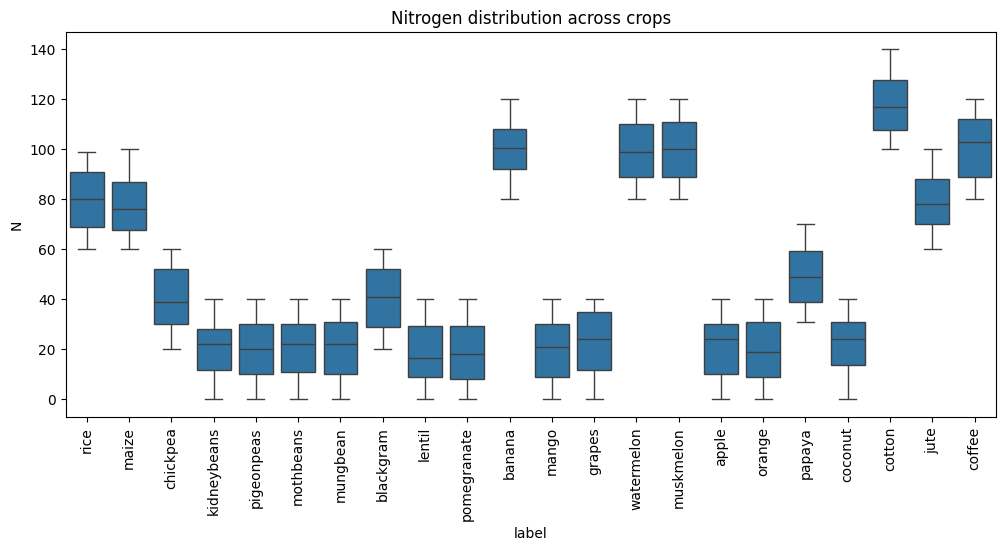

In [19]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='label', y='N', data=df_clean)
plt.xticks(rotation=90)
plt.title("Nitrogen distribution across crops")
plt.show()

Phosphorus vs Crop

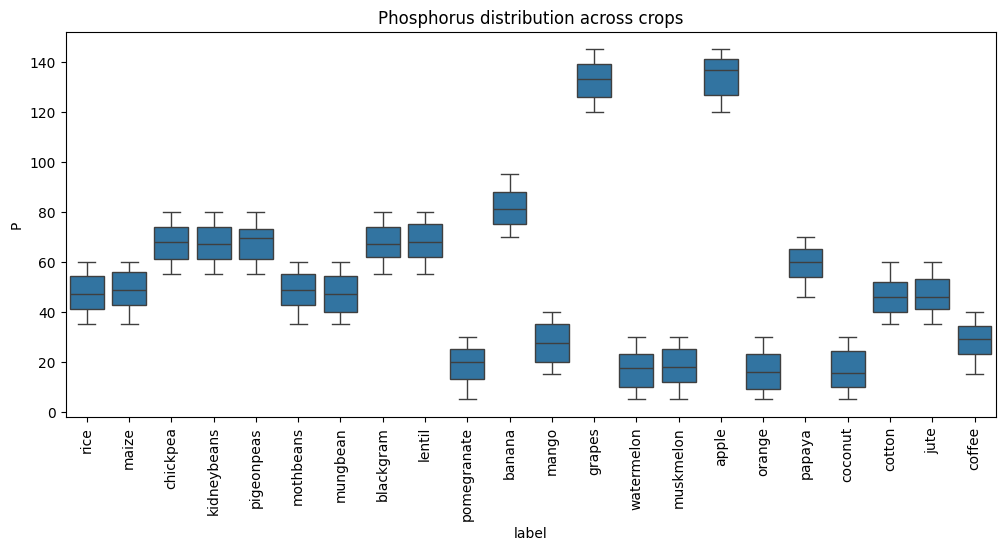

In [18]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='label', y='P', data=df_clean)
plt.xticks(rotation=90)
plt.title("Phosphorus distribution across crops")
plt.show()

Potassium vs Crop

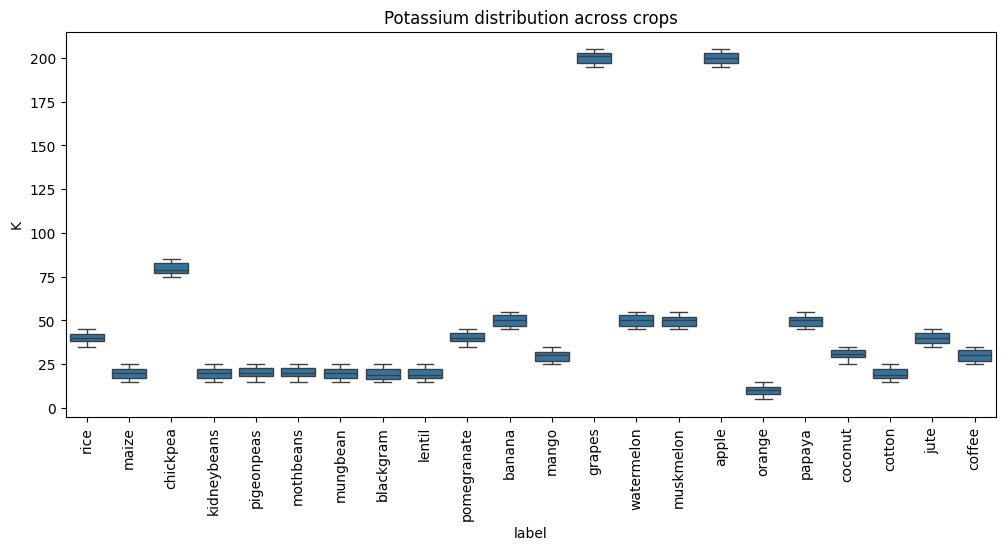

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='label', y='K', data=df_clean)
plt.xticks(rotation=90)
plt.title("Potassium distribution across crops")
plt.show()

pH vs Crop

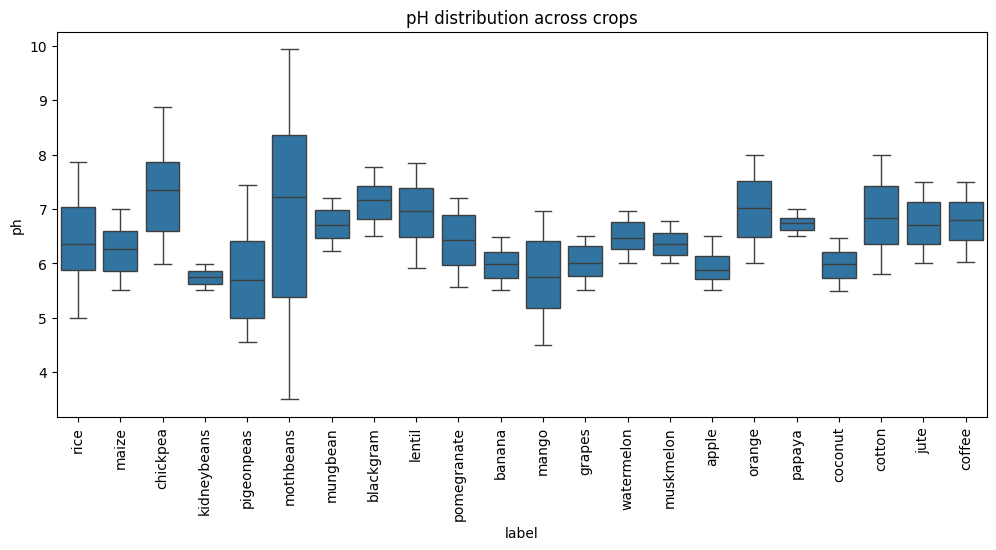

In [21]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='label', y='ph', data=df_clean)
plt.xticks(rotation=90)
plt.title("pH distribution across crops")
plt.show()

**Correlation Analysis**

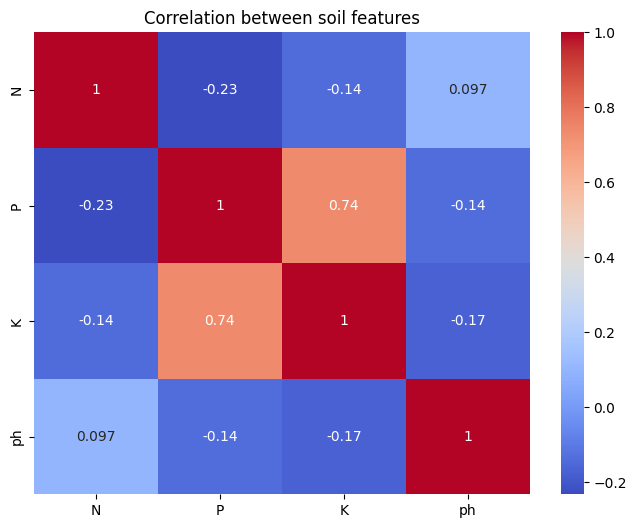

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['N', 'P', 'K', 'ph']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between soil features")
plt.show()

| Feature    | Observed Separability | Stability |
| ---------- | --------------------- | --------- |
| Nitrogen   | Low                   | Medium    |
| Phosphorus | Medium                | Medium    |
| Potassium  | Medium                | Medium    |
| **pH**     | **High**              | **High**  |


# Model Development

In [25]:
crop_df = df_clean.copy()

Prepare data for model

In [26]:
X = crop_df.drop('label', axis=1)
y = crop_df['label']

Split the dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model evalution function

In [40]:
def evaluate_feature(fn):
   X_tr = X_train[[fn]]
   X_te = X_test[[fn]]

   scaler = StandardScaler()
   X_tr_scaled = scaler.fit_transform(X_tr)
   X_te_scaled = scaler.transform(X_te)

   results = {}

   models = {
       "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
       "Logistic Regression": LogisticRegression(max_iter=1000),
       "Naive Bayes": GaussianNB()
   }

   for n, model in models.items():
    model.fit(X_tr_scaled, y_train)
    preds = model.predict(X_te_scaled)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')

    results[n] = (acc, f1)

   return results

Run test in each feature

In [41]:
features = ['N', 'P', 'K', 'ph']

all_results = {}

for feature in features:
    all_results[feature] = evaluate_feature(feature)

In [42]:
summary = []

for feature, models in all_results.items():
    for model, scores in models.items():
        summary.append([feature, model, scores[0], scores[1]])

results_df = pd.DataFrame(
    summary,
    columns=['Feature', 'Model', 'Accuracy', 'Macro_F1']
)

results_df

,Feature,Model,Accuracy,Macro_F1
0,N,Decision Tree,0.136364,0.091136
1,N,Logistic Regression,0.152273,0.114719
2,N,Naive Bayes,0.165909,0.131326
3,P,Decision Tree,0.156818,0.079661
4,P,Logistic Regression,0.165909,0.098642
5,P,Naive Bayes,0.177273,0.122605
6,K,Decision Tree,0.195455,0.147869
7,K,Logistic Regression,0.245455,0.145600
8,K,Naive Bayes,0.256818,0.227018
9,ph,Decision Tree,0.156818,0.074034


Final Model

In [43]:
fm = DecisionTreeClassifier(max_depth=3, random_state=42)
fm.fit(X_train[['ph']], y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)